**Malarial Detection**

Malaria is a life-threatening disease caused by parasites that are transmitted to people through the bites of infected female Anopheles mosquitoes. 

It is preventable and curable.
In 2018, there were an estimated 228 million cases of malaria worldwide.
The estimated number of malaria deaths stood at 405 000 in 2018. 

Model made for Save humans by detecting and deploying Image Cells that contain Malaria or not!

This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ .


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**SetUps**

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import os
from tensorflow import keras
import tensorflow as tf
import h5py

Using TensorFlow backend.


**Archiitecture of CNN** 

In [0]:
#initialing the cnn
classifier=Sequential()

In [0]:

#step-1 convolution
classifier.add(Conv2D(32, (3, 3),input_shape=(64,64,3),activation ='relu'))

In [0]:
# step 2. pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [0]:

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.4))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Step 3 - Flattening
classifier.add(Flatten())

In [0]:

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [0]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/data_Malaria/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

val_set = test_datagen.flow_from_directory('/content/drive/My Drive/data_Malaria/val',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 16534 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


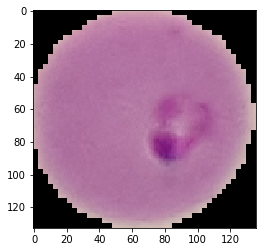

In [0]:
#Infected
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/My Drive/data_Malaria/train/Infected/Infected_10001.png')
imgplot = plt.imshow(img)

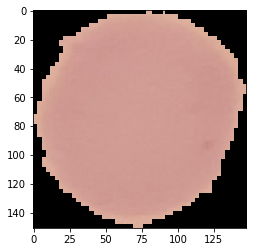

In [0]:
#Uninfected
img = mpimg.imread('/content/drive/My Drive/data_Malaria/test/Uninfected/Uninfected_2757.png')
imgplot = plt.imshow(img)

**checkpoint**

In [0]:
from keras.callbacks import ModelCheckpoint
filepath="weights.best.h5"
checkpoint=ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callbacks_list=[checkpoint]

**Fit the model**

In [0]:
history=classifier.fit_generator(training_set,
                         steps_per_epoch = 16534//32,
                         epochs =20,
                         validation_data = val_set,
                         validation_steps = 5512//32,
                         callbacks=callbacks_list,shuffle=True)

Epoch 1/20
516/516 [==============================] - 4888s 9s/step - loss: 0.5455 - acc: 0.7253 - val_loss: 0.2772 - val_acc: 0.8964
Epoch 2/20
  1/516 [..............................] - ETA: 5s - loss: 0.3757 - acc: 0.8750

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


516/516 [==============================] - 61s 117ms/step - loss: 0.2805 - acc: 0.8941 - val_loss: 0.2037 - val_acc: 0.9296
Epoch 3/20
516/516 [==============================] - 60s 116ms/step - loss: 0.2302 - acc: 0.9156 - val_loss: 0.1878 - val_acc: 0.9272
Epoch 4/20
516/516 [==============================] - 61s 118ms/step - loss: 0.2099 - acc: 0.9311 - val_loss: 0.1723 - val_acc: 0.9361
Epoch 5/20
516/516 [==============================] - 59s 115ms/step - loss: 0.1998 - acc: 0.9336 - val_loss: 0.1695 - val_acc: 0.9394
Epoch 6/20
516/516 [==============================] - 60s 117ms/step - loss: 0.1848 - acc: 0.9394 - val_loss: 0.1910 - val_acc: 0.9305
Epoch 7/20
516/516 [==============================] - 59s 115ms/step - loss: 0.1778 - acc: 0.9452 - val_loss: 0.1707 - val_acc: 0.9361
Epoch 8/20
516/516 [==============================] - 60s 117ms/step - loss: 0.1729 - acc: 0.9451 - val_loss: 0.1706 - val_acc: 0.9327
Epoch 9/20
516/516 [==============================] - 60s 117ms/st

**Ploting accuracy curve and loss curve**

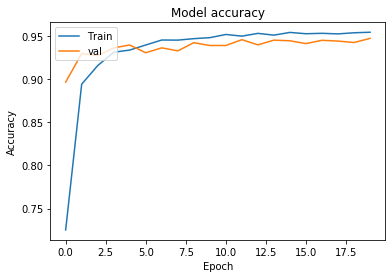

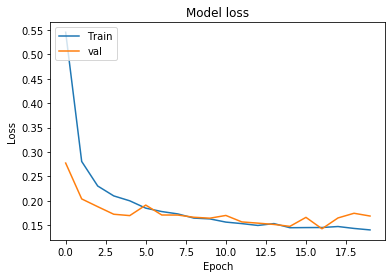

In [0]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()


#saving model
classifier.save('malaria_classifier.h5')

In [0]:
from keras.models import load_model

from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale = 1./255)
new_model=load_model('malaria_classifier.h5')

In [0]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/data_Malaria/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 5516 images belonging to 2 classes.


**Evaluation on test test**

In [0]:
result=new_model.evaluate_generator(test_set,32)
result

[0.14244460288318805, 0.9560546875]

In [0]:
print(test_set.class_indices)
print(type(test_labels))
test_labels=np.array(test_labels)
type(test_labels)

{'Infected': 0, 'Uninfected': 1}
<class 'numpy.ndarray'>


numpy.ndarray

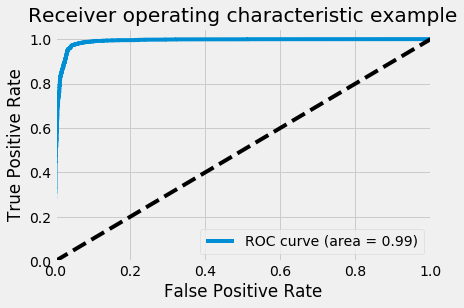

In [0]:

from sklearn.metrics import roc_curve, auc
n_classes=2
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(test_labels, y_pred)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()